In [2]:
from scipy.optimize import fsolve
import math 
import numpy as np


def universal_func(So=2000, Fo=0, mm_dry = 0.028):
    g = 13.7 #m/s^2 #gravity
    Pc = 6e4
    Po = 1.01e5
    R_star = 8.3145
    def equations(p): 
        T1, T2, T3, T4, Fa, Fc = p 

        ### Constants
        es0 = 611.2
        
        M = 0.018
        To = 273.15
        mass_ratio = M/mm_dry

        sigma = 5.67e-8 #W /m^2 K^4  Stefan Boltzmann Constant
        po = 1010 #surface pressure
        p = 600 #pressure of free-troposphere
        
        H = ((R_star/mm_dry)*T2)/g #scale height
        
        Tc = 230 #Cloud emission temp
        Z_a = np.log(po/p)*H #convection height
        Cp = 1005.7 #J/kgK #heat capacity
        L = 2.501e6 # J/kg #latent heat of vaporization
        

        es_1 = es0*pow(np.e, L/(R_star/M)*(1/To - 1/T1))
        w_1 = mass_ratio*es_1/(Po - es_1) #saturated mixing ratio
        q1_s = w_1/(1+w_1)

        es_2 = es0*pow(np.e, L/(R_star/M)*(1/To - 1/T2))
        w_2 = mass_ratio*es_2/(Pc - es_2) #saturated mixing ratio
        q2_s = w_2/(1+w_2)

        RH_1 = 0.9 #Relative Humidity
        RH_2 = 0.8 
        RH_3 = 0.3
        q1 = RH_1 * q1_s
        q2 = RH_2 * q2_s #specific humidity
        q3 = RH_3 * q2_s #specific humidity

        #So = 2000 # W/m^2 Solar insolation
        #Fo' = 0 # Ocean heat transport

        #fc = 1.0 # cloud fraction
        
        k1 = 0.2 # Fraction of heat transport to the nightside deposited in the boundary layer
        k2 = 1000 # Relates water vapor to the infrared opacity 
        k3 = 0.08 # relates the strength of convection to the cloud fraction
        Fd = k1*Fa

        fc = k3*np.log(Fc+1.0)
        alpha_p = 0.09+fc - 0.09*fc # planetary albedo

        epsilon_2 = 1 - np.exp(-k2*q2) #emissivity
        epsilon_3 = 1 - np.exp(-k2*q3)

        Eq2 = (1/2)*So*(1-alpha_p)-Fc - Fo + (1-fc)*epsilon_2*sigma*T2**4 + fc*sigma*Tc**4 - sigma*T1**4

        Eq3 = Fc - Fa + (1-fc)*epsilon_2*sigma*T1**4 + fc*sigma*T1**4 - 2*(1-fc)*epsilon_2*sigma*T2**4 - 2*fc*sigma*Tc**4

        Eq4 = Fa - Fd + epsilon_3*sigma*T4**4 - 2*epsilon_3*sigma*T3**4

        Eq5 = Fo + Fd + epsilon_3*sigma*T3**4 - sigma*T4**4

        Eq6 = T2 - T3

        Eq7 = Cp*T1 + L*q1_s - (Cp*T2+L*q2_s + g*Z_a)

        if index==0:
            return (Eq2, Eq3, Eq4, Eq5, Eq6, Eq7)
        if index==1:
            return(q1,q2,q3,alpha_p,epsilon_2,epsilon_3)
        """
        # Old version, to be deleted
        def Eq2(So,alpha_p,Fc,Fo,epsilon_2,sigma,fc,Tc):     
            return (1/2)*So*(1-alpha_p)-Fc - Fo + (1-fc)*epsilon_2*sigma*T2**4 + fc*sigma*Tc**4 - sigma*T1**4

        def Eq3(Fc,Fa,epsilon_2,sigma,T1,T2,Tc):
            return Fc - Fa + (1-fc)*epsilon_2*sigma*T1**4 + fc*sigma*T1**4 - 2*(1-fc)*epsilon_2*sigma*T2**4 - 2*fc*sigma*Tc**4

        def Eq4(Fa,Fd,T3,sigma,T4): 
            return Fa - Fd + epsilon_3*sigma*T4**4 - 2*epsilon_3*sigma*T3**4

        def Eq5(Fo,Fd,epsilon_3,sigma, T3, T4):  
            return Fo + Fd + epsilon_3*sigma*T3**4 - sigma*T4**4

        def Eq6(T2,T3): 
            return T2 - T3

        def Eq7(T1, T2):
            return Cp*T1 + L*q1_s - (Cp*T2+L*q2_s + g*Z_a)

        return (Eq2(So,alpha_p,Fc,Fo,epsilon_2,sigma,fc,Tc), Eq3(Fc,Fa,epsilon_2,sigma,T1,T2,Tc), 
                Eq4(Fa,Fd,T3,sigma,T4), Eq5(Fo,Fd,epsilon_3,sigma, T3, T4),
                Eq6(T2,T3), Eq7(T1,T2))
        """
    index=0
    T1, T2, T3, T4, Fa, Fc = fsolve(equations, (250,250,200,200,200,20))        
    fc_2 = 0.08*np.log(Fc+1)
    index=1
    q1,q2,q3,alpha_p,epsilon_2,epsilon_3 = equations((T1, T2, T3, T4, Fa, Fc)) 
    H = ((R_star/mm_dry)*T2)/g #scale height
    print('Scale Height: ',H,' m')
    return (T1, T2, T3, T4, Fa, Fc, fc_2,
            q1,q2,q3,alpha_p,epsilon_2,epsilon_3)

In [3]:
so = np.linspace(1000,2500,100)
nele = len(so)
T1_arr, T2_arr, T3_arr, T4_arr, Fa_arr, Fc_arr, fc_arr = np.zeros(nele), np.zeros(nele), np.zeros(nele), np.zeros(nele), np.zeros(nele), np.zeros(nele), np.zeros(nele)
q1_arr,q2_arr,q3_arr,alpha_p_arr,epsilon_2_arr,epsilon_3_arr = np.zeros(nele), np.zeros(nele), np.zeros(nele), np.zeros(nele), np.zeros(nele), np.zeros(nele)

for idx,s in enumerate(so):
    T1_arr[idx], T2_arr[idx], T3_arr[idx], T4_arr[idx], Fa_arr[idx], Fc_arr[idx], fc_arr[idx], \
    q1_arr[idx],q2_arr[idx],q3_arr[idx],alpha_p_arr[idx],epsilon_2_arr[idx],epsilon_3_arr[idx] = universal_func(So = s)

Scale Height:  5248.137384325075  m
Scale Height:  5259.713164671481  m
Scale Height:  5270.951066412278  m
Scale Height:  5281.872572935599  m
Scale Height:  5292.4975384868185  m
Scale Height:  5302.844338465616  m
Scale Height:  5312.929999556196  m
Scale Height:  5322.770322191625  m
Scale Height:  5332.379989928485  m
Scale Height:  5341.772669725177  m
Scale Height:  5350.961093133452  m
Scale Height:  5359.957140845228  m
Scale Height:  5368.771914021882  m
Scale Height:  5377.415800288388  m
Scale Height:  5385.898531586126  m
Scale Height:  5394.229234841495  m
Scale Height:  5402.416512643429  m
Scale Height:  5410.468427111444  m
Scale Height:  5418.392583087609  m
Scale Height:  5426.196178511875  m
Scale Height:  5433.886001879014  m
Scale Height:  5441.468486104378  m
Scale Height:  5448.949727612152  m
Scale Height:  5456.335518740745  m
Scale Height:  5463.631377634452  m
Scale Height:  5470.842547150964  m
Scale Height:  5477.974045794267  m
Scale Height:  5485.0306695

In [4]:
universal_func(So = 1000)

Scale Height:  5248.137384325075  m


(271.8374637354997,
 242.12947268351652,
 242.12947268351652,
 163.5141383716033,
 62.702693097968655,
 82.96457062897235,
 0.3544315945314671,
 0.003187917215822912,
 0.00041348992226353427,
 0.00015505872084882534,
 0.41253275102363507,
 0.33866180086106035,
 0.14363511046606525)

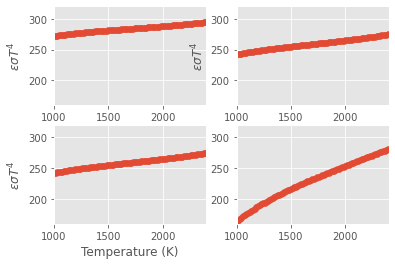

In [8]:
import matplotlib.pyplot as plt
full_arr = [T1_arr, T2_arr, T3_arr, T4_arr]
for idx, arr in enumerate(full_arr):
    #fig = plt.figure(figsize =(12,6))
    plt.style.use('ggplot')
    plt.xlabel('Temperature (K)')
    plt.ylabel(r'$\epsilon \sigma T^4$')
    plt.subplot(2,2,idx+1)
    plt.scatter(so, arr)
    plt.xlim(1000,2400)
    plt.ylim(160,320)

In [6]:
import numpy as np

po = 1010
p = 600 
h = 5000

z = np.log(po/p)*h
print(z)

2603.879773095794


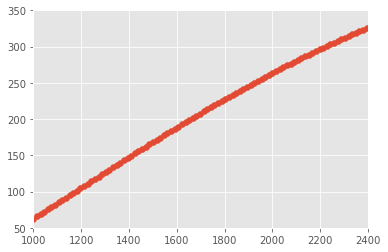

In [7]:
import matplotlib.pyplot as plt
full_arr = [Fa_arr]
for idx, arr in enumerate(full_arr):
    plt.subplot(1,1,idx+1)
    plt.scatter(so, arr)
    plt.xlim(1000,2400)
    plt.ylim(50,350)